### Initial Plan
 - Use unsupervised learning
 - Recommender system (content-based)
     - Want to refer to MedDRA Preferred Terms and Outcomes values when relating similar products, or products that result in similar reactions
     - Plan to use count vectorizer, so going to keep in those observations that are null for MedDRA, but have values for Outcomes
         - Might have to adjust this depending on results of first recommender system
     
 

### Discovery
 - Product Type includes Suspect and Concomitant
     - If a consumer/patient experienced adverse event, they would include the product that is "suspected" as being the cause of adverse event, along with any other products (concomitant) that were being consumed or used at the same time in case those contriubted to the adverse events.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
adverse_events = pd.read_csv('./datasets/adverse_events_2.csv')
adverse_events

/Users/jmiger/anaconda3/envs/dsi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Report ID,CAERS Created Date,Date of Event,Product Type,Product,Product Code,Description,Patient Age,Age Units,Sex,MedDRA Preferred Terms,Outcomes
0,65335,1/1/2004,11/24/2003,SUSPECT,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Products,3.0,month(s),NaN,"VOMITING, GASTROINTESTINAL DISORDER",Other Outcome
1,65345,1/1/2004,12/21/2003,SUSPECT,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",07,Snack Food Item,10.0,year(s),M,CHOKING,Other Outcome
2,65350,1/1/2004,NaN,SUSPECT,GRAPE,20,Fruit/Fruit Prod,NaN,NaN,NaN,"DEATH, CHOKING",Death
3,65336,1/1/2004,NaN,SUSPECT,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Products,NaN,NaN,NaN,"PHYSICAL EXAMINATION, GASTROINTESTINAL DISORDER",Patient Visited Healthcare Provider
4,65333,1/1/2004,NaN,SUSPECT,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,NaN,NaN,"NAUSEA, DYSGEUSIA, DIARRHOEA",Patient Visited ER
5,65325,1/1/2004,8/4/2003,SUSPECT,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,03,Bakery Prod/Dough/Mix/Icing,2.0,year(s),F,"WHEEZING, SWELLING FACE, RASH, HOSPITALISATION...","Hospitalization, Patient Visited Healthcare Pr..."
6,65354,1/2/2004,NaN,SUSPECT,YOHIMBE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),66.0,year(s),M,BLOOD PRESSURE INCREASED,Required Intervention
7,65357,1/2/2004,10/27/2003,SUSPECT,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,NaN,NaN,NaN,"VOMITING, RASH, MALAISE, LOOSE STOOLS, DIARRHO...",Other Outcome
8,65355,1/2/2004,10/27/2003,SUSPECT,CAL-C PEACH TROPIC ENRICHED BEVERAGE BLEND,29,Soft Drink/Water,NaN,NaN,NaN,"VOMITING, RASH, PHYSICAL EXAMINATION, OROPHARY...",Other Outcome
9,65353,1/2/2004,12/1/2003,SUSPECT,HERBALIFE TOTAL CONTROL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),NaN,NaN,NaN,"PHYSICAL EXAMINATION, PARANOIA, DELUSION",Patient Visited Healthcare Provider


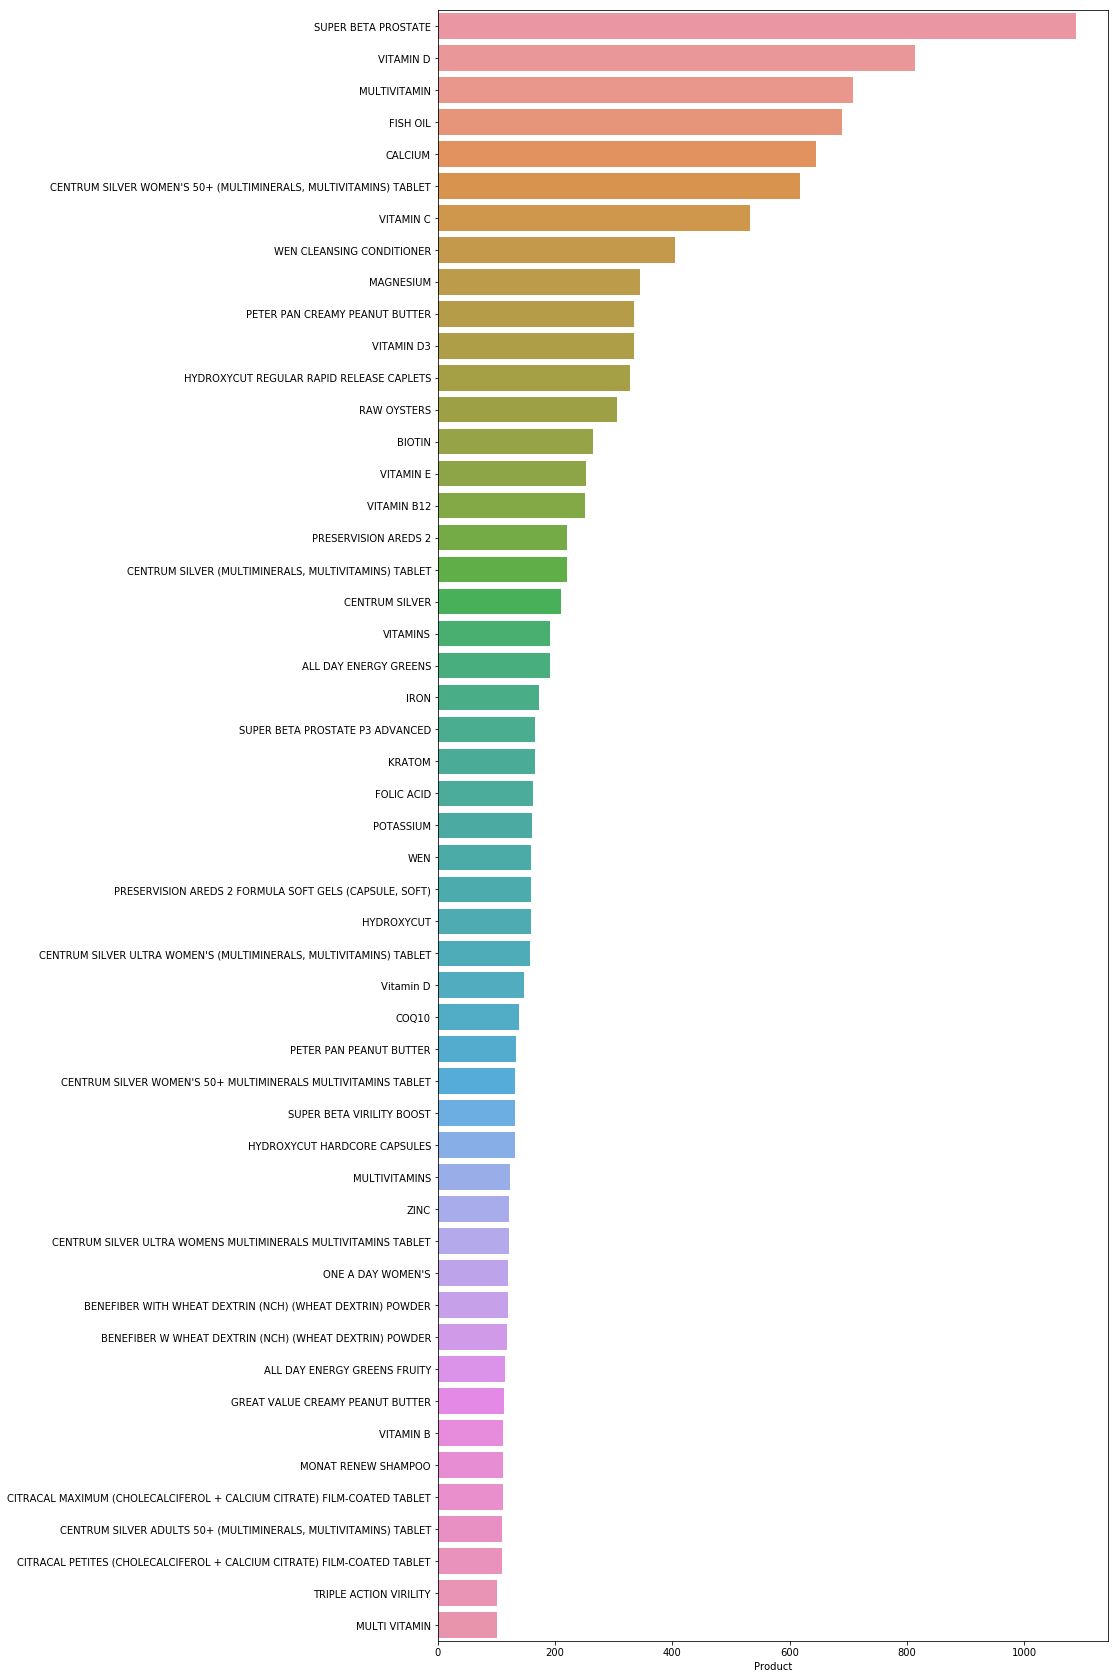

In [6]:
reported_prod_above_100 = adverse_events['Product'].value_counts()[adverse_events['Product'].value_counts() > 100]

plt.figure(figsize=(12, 30))
sns.barplot(x = reported_prod_above_100, y = reported_prod_above_100.index);

### Lessons Learned

- Don't need to separate the different symptoms (MedDRA) to be their own columns. Will be using countervec anyway to create a bag of words
- Combining Suspected and Concomitant products that are under the same Report ID was not a good idea because it underestimates how often products are reported as individuals. 
    - Not all reports for a certain "Suspect" product will be linked to the same concomitant products that others have included in their reports
- Couldn't keep the rows that contained nulls in the MedDRA column. Otherwise, it considers the column as a float and doesn't allow me to groupby the rows by the 'Product' column.
    - It's 916 rows, so removing will still result in 100,749 total observations (101665 - 916).

### Next Steps
- Disregard dates and combine the rows under the same product for recommender system
    - Save under a different dataframe in order to still use original dataframe to do research and look further into products that were reported the most